# Estimating total payments for insurance claims

Dataset: The Swedish Auto Insurance Dataset 

It involves predicting the total payment for all claims in thousands of Swedish Kronor(Y column), given the total number of claims(X column).

Swedish Auto Insurance Dataset:
* [Download](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls)
* [More Information](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)


#### Why do we want to apply regression on selected dataset?

The Swedish Auto Insurance data set contains two columns (X,Y) as shown in code below. The X column represents the number of claims and the Y represents the total payment amount in Swedish Kronor. 

As dependent variable is continuous data, regression is suitable model to use here.

Also, it is expected that as the number of claims increases, total claim amount will also increase.This is indicating application of linear regression.

Using Simple Linear Regression it is possible to identify the relation between the number of claims and the total payment. This relation can be stored and used to predict the total payment for a new number of claims. 

In reality, this could be used to estimate a budget for a new period. For example, the insurance company expects 100 claims in the new period, how much money do they have to put aside?

In [1]:
## Importing required packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
# Import data
data = pd.read_excel('slr06.xlsx')

# let's see what's there in data
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
# Shape will give us dimentions of data
data.shape

(63, 2)

####  Observations in data

There are total 63 observations in data from code below.
There are total two columns out of which one is dependent and one is independent. Here, X is independent variable which indicates total number of claims. Y is dependent variable which is indicating total amount of claims in specific observation.

###### Which are most useful variable in estimation? 

Here, data has only one independent variable which has linear correlation with independent variable. This can be visulized using Scatter plot below.

Understanding: Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people.

If there are more than one independent variable, not all independent variables contributes equally in estimation of dependent variable. This can be quatified using correlation between dependent and independent variable.

corr function in sklearn can be used to find correlation between variables. 
We can find correlation of each independent variable with dependent vatiable using loop, store them in a list/dataframe, sort them and finally decide which varible to use in delveloping model.

In [4]:
# Using corr to find correlation between x and y
d = data.corr()
d.iloc[0:1,1:]

,Y
X,0.912878


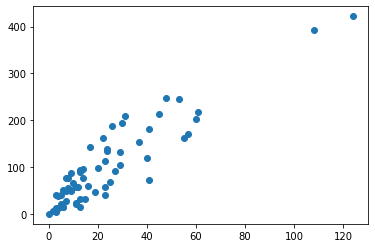

In [5]:
# Correlation chart: Scatterplot can be used to visulize correlation between two variables
plt.scatter(data.X, data.Y)
plt.show()

Following two methods will be used here to find slope(m) and intercept(c) -
1. Least Squares  
2. Gradient Descent

# Implementation of linear regression using Ordinary least squares (OLS)

In [6]:
df = data
x_bar = df.X.sum()/df.X.count() 
y_bar = df.Y.sum()/df.Y.count()
print("x_bar: " + str(x_bar) + "\ny_bar: " + str(y_bar))

n = ((df.X-x_bar) * (df.Y-y_bar)).sum()
d = ((df.X-x_bar)**2).sum()
m = n/d
c = y_bar - m* x_bar
print("m: " + str(m) + "\nc: " + str(c))

x_bar: 22.904761904761905
y_bar: 98.18730158730159
m: 3.413823560066367
c: 19.99448575911481


### Plotting the line along data

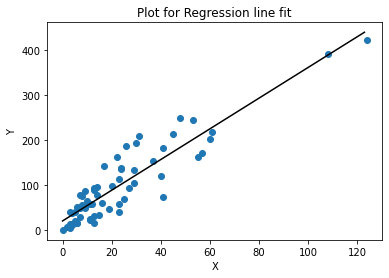

In [7]:
predicted_df = pd.DataFrame(data = range(0,df.X.max()), columns={'X'})
predicted_df['Y'] = predicted_df.X*m + (c)

x = predicted_df['X']
y = predicted_df['Y']

plt.plot(x,y,c='black')
plt.scatter(df.X, df.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for Regression line fit')
plt.show()

### Quantify goodness of the model and steps taken for improvement (RMSE, SSE, R2Score).

1. In sklearn mean_squared_error function can be used to find RMSE, SSE
   * RMSE = square root of (mean_squared_error)
   * SSE  = mean_squared_error * total Number of observations
2. In sklearn r2_score function is available to find r2_score

In [8]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+c))
SSE  = mean_squared_error(df.Y, m*df.X+c) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+c)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

RMSE =  35.365829968791466
SSE =  78796.74155103252
r2score=  0.8333466719794502


# Implementation of linear regression using Gradient Descent
To learn more about linear regression using gradient descent you can read this 5 minutes article on Medium - [Link](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

In [9]:
# Select Data
X = df.iloc[:, 0]
Y = df.iloc[:, 1]

m = 0
c = 0
L = 0.00001        # The learning Rate
epochs = 1000      # The number of iterations to perform gradient descent
n = float(len(X))  # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c                      # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)        # Derivative wrt c
    m = m - L * D_m                       # Update m
    c = c - L * D_c                       # Update c
print (m, c)

3.839435644786321 0.28326102562162586


### Quantify goodness of the model and discuss steps taken for improvement (RMSE, SSE, R2Score).

In [10]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+c))
SSE  = mean_squared_error(df.Y, m*df.X+c) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+c)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

RMSE =  38.042215166609445
SSE =  91174.23849130442
r2score=  0.8071685456120731


# Implementation of linear regression Using sklearn API

In [11]:
# Select Data
X = pd.DataFrame(df.X)
Y = df.Y

# Create object of algorithm
rg = linear_model.LinearRegression()
# Create model by fitting data
rg.fit(X, Y)

LinearRegression()

### Quantify goodness of the model and discuss steps taken for improvement (RMSE, SSE, R2Score).

In [12]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+c))
SSE  = mean_squared_error(df.Y, m*df.X+c) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+c)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

RMSE =  38.042215166609445
SSE =  91174.23849130442
r2score=  0.8071685456120731


### Plot data with Regression Line

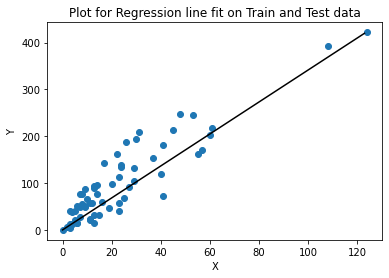

In [13]:
x = np.array(range(0,int(X.max())))
x = x.reshape(1,124)
y = x*rg.coef_

plt.scatter(df.X, df.Y)
plt.plot(x[0], y[0], c='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for Regression line fit on Train and Test data')
plt.show()